# **Tugas 5 | Implementasi Decision Tree**

## Cara Kerja Algoritma Decision Tree

### Menyiapkan Data Latih

Data latih biasanya diambil dari data yang pernah terjadi sebelumnya dan sudah dikelompokkan ke dalam kelas – kelas tertentu.

### Menentukan Akar Pohon

Akar akan diambil dari atribut yang terpilih, dengan cara menghitung nilai gain dari masing – masing atribut. Nilai gain yang paling tinggi akan menjadi akar pertama. Sebelum menghitung niali gain dari atribut, harus menghitung dulu nilai entropy


**Rumus Entropy :**
> *Entropy*$(D_1) = - ∑_{i=1}^{m}p_i log_2 p_i$

```
  ket :
  D  = himpunan kasu
  m  = jumlah partisi D
  pi = proporsi dari Di terhadap D
``` 

**Rumus Gain$(D_1)$ :**
> $Gain(E_{new}) = E_{initial} - E_{new}$

```
  ket:
  Gain     = gain
  Einitial = jumlah_data_width
  Enew     = infoa
```

### Mengulangi Langkah Ke 2

Mengulangi langkah ke 2 hingga semua record terpartisi atau sampai setiap leaf tidak ada campuran data/kelas

Proses partisi pohon keputusan akan berhenti saat, semua record dalam simpul N mendapat kelas yang sama, tidak ada atribut record yang dipartisi lagi dan tidak ada record didalam cabang yang kosong.

## Implementasi ke Bahasa Pemrograman Python


### Persiapan Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier



#load in the data
data = load_iris()
#convert to a dataframe
df = pd.DataFrame(data.data, columns = data.feature_names)
#create the species column
df['Species'] = data.target
#replace this with the actual names
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Pisahkan antara data uji dan data training (60:40)%

persentase untuk data latih, bisa di rubah pada parameter `test_size`. Dibawah ini, diisi **`0.4`** karena ingin mengambil 40% dari data yang ada

In [ ]:
#extract features and target variables
x = df.drop(columns="Species")
y = df["Species"]
#save the feature name and target variables
feature_names = x.columns
labels = y.unique()
#split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(x,y,test_size = 0.4,random_state = 42)
test_x.count()

sepal length (cm)    60
sepal width (cm)     60
petal length (cm)    60
petal width (cm)     60
dtype: int64

### Pengklasifikasian Menggunakan data Uji

`max_depth` adalah parameter yang mengatur kedalaman atau akar, sedangkan `random_state` adalah parameter yang mengatur sebagai perombakan data.

In [ ]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)


### Menampilkan Hasil dalam bentuk text diagram

In [ ]:
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: setosa
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: virginica
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: virginica



### Menampilkan Hasil dalam bentuk plot diagram

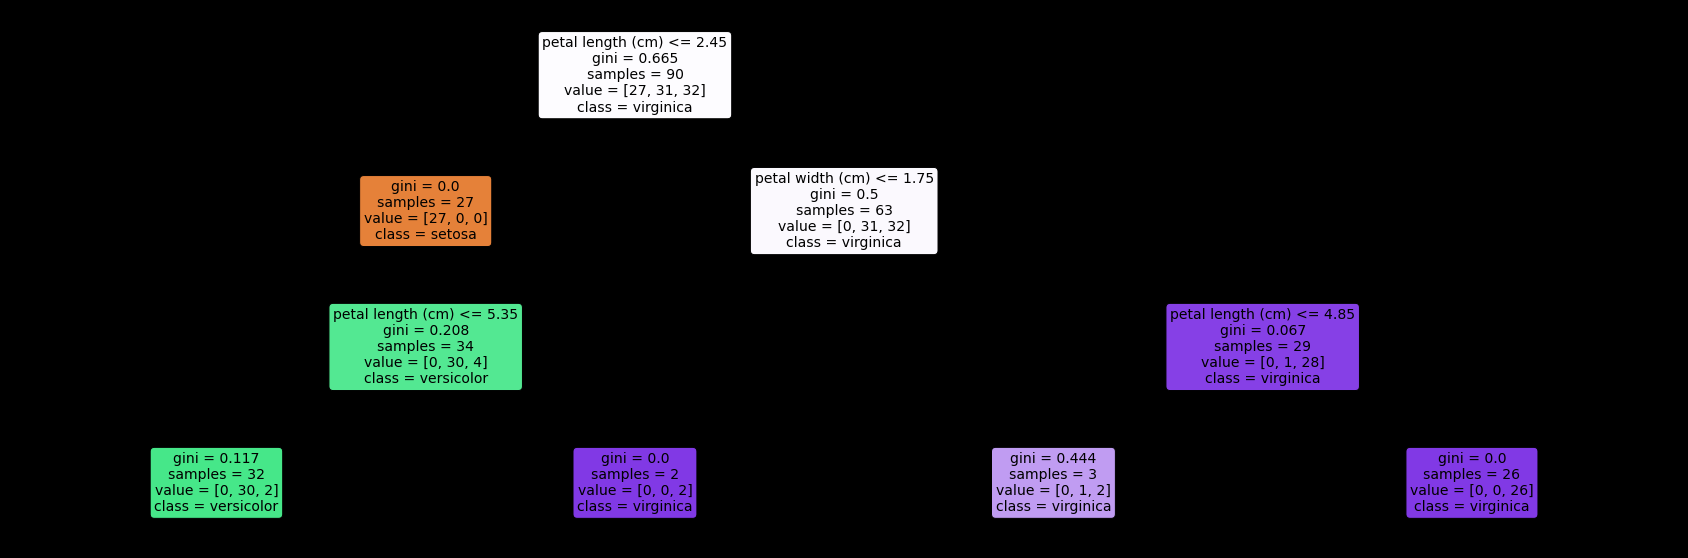

In [ ]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt

#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

### Hasil

In [ ]:
test_pred_decision_tree = clf.predict(test_x)
test_pred_decision_tree

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor'], dtype=object)

### Akurasi dari Decision Tree

Rumus Menghitung akurasi:
> $Akurasi = {{TP + TN}\over Total Data} * 100 \% $

```
  Ket:
  TP  = Jumlah data yang terklasifikasi True Positive
  TN  = Jumlah data yang terklasifikasi True Negative
  Jumlah Data = Jumlah data keseluruhan
``` 



Akurasi yang diperoleh dari algoritma ***Decision Tree*** pada data iris sebesar: 

In [ ]:
from sklearn import metrics
metrics.accuracy_score(test_lab, test_pred_decision_tree)

0.9833333333333333